In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Historical Product Demand.csv', parse_dates=['Date'])

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [4]:
df.shape

(1048575, 5)

In [5]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [6]:
print(df.isnull().any().sum(), ' / ', len(df.columns))
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

1  /  5
11239  /  1048575


In [7]:
print (df.isna().sum())
print ('Null to Dataset Ratio in Dates: ',df.isnull().sum()[3]/df.shape[0]*100)
#There are missing values in Dates.

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
Null to Dataset Ratio in Dates:  1.0718355863910547


In [8]:
#Removing the nulls, since the number of missing values are about 1% 
df.dropna(axis=0, inplace=True) 
df.reset_index(drop=True)
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [9]:
#Target Feature - Order_Demand
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")

#Next step is to change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

C:\Users\vaish\AppData\Local\Temp\ipykernel_4800\2317496745.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
C:\Users\vaish\AppData\Local\Temp\ipykernel_4800\2317496745.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")


In [10]:
#Get the lowest and highest dates in the dataset.
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [11]:
df.shape

(1037336, 5)

In [12]:
df.describe()

,Order_Demand
count,1.037336e+06
mean,4.949384e+03
std,2.907344e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [13]:
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


<AxesSubplot:xlabel='Warehouse', ylabel='count'>

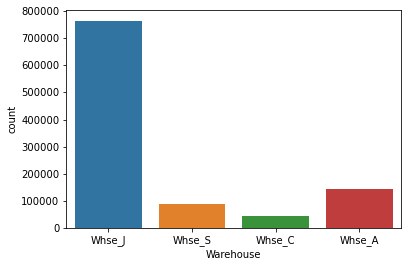

In [14]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

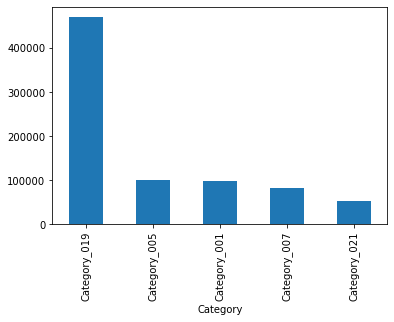

In [15]:
df.Category.value_counts().head(5).plot(kind = 'bar')
plt.xlabel('Category')
plt.show()

In [16]:
# Set index to Date and Variable
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

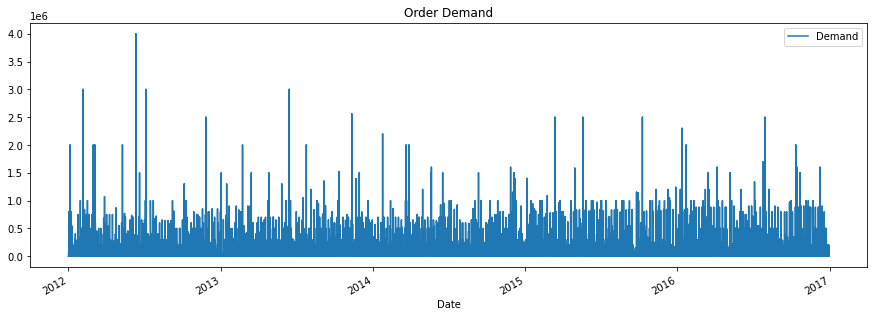

In [17]:
df_new = df.loc[(df.index >= '01-01-2012') & (df.index < '01-01-2017')]
df_new.plot(figsize=(15, 5), title = 'Order Demand' )
plt.show()

In [18]:
df.Demand.skew()

31.432925049321977

In [19]:
warehouse_Demand = df.groupby('Warehouse')['Demand'].sum()
warehouse_Demand

Warehouse
Whse_A     147877431
Whse_C     585071404
Whse_J    3363200396
Whse_S    1038024700
Name: Demand, dtype: int64

In [20]:
df['Warehouse'].value_counts()

Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

<AxesSubplot:xlabel='Warehouse', ylabel='Sum of demand'>

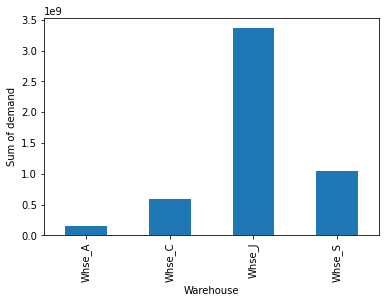

In [21]:
warehouse_Demand.plot(kind='bar', ylabel = 'Sum of demand' )

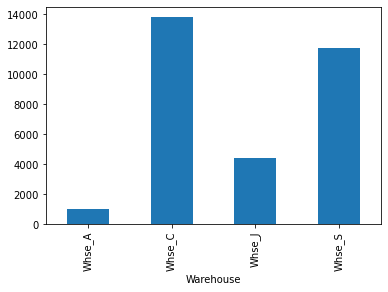

In [22]:
# demand for each warehouse mean
df.groupby('Warehouse')['Demand'].mean().plot(kind = 'bar')
plt.show()

In [23]:
df.groupby('Warehouse')['Demand'].mean()

Warehouse
Whse_A     1038.939340
Whse_C    13813.840582
Whse_J     4399.520694
Whse_S    11768.987528
Name: Demand, dtype: float64

In [24]:
df_model=df

In [25]:
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df_new)
df.dtypes

Code               object
Warehouse          object
Category           object
Demand              int64
day_of_the_week     int64
Quarter             int64
Month               int64
Year                int64
Week                int32
dtype: object

In [26]:
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']

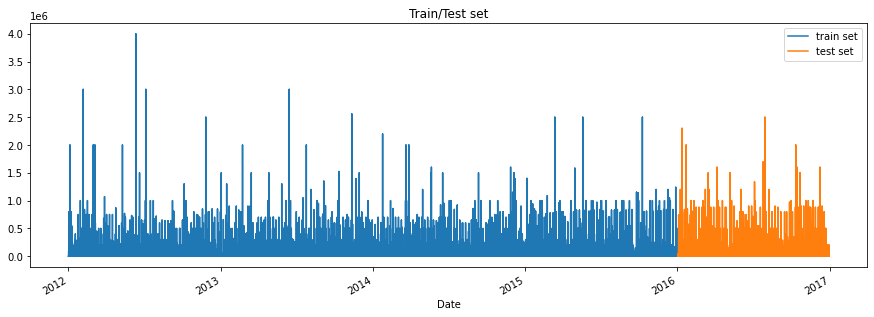

In [27]:
# xgboost
df_train = df.loc[df.index <= '2016-01-01'].copy()
df_test = df.loc[df.index > '2016-01-01'].copy()

#plot train/test
fig, ax = plt.subplots(figsize = (15,5))
df_train.Demand.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
df_test.Demand.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [28]:
#Split the data into training set and testing set 
X_train = df_train[Features]
X_test = df_test[Features]

y_train = df_train[target]
y_test = df_test[target]

In [29]:
! pip install xgboost

In [30]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01).fit(X_train, y_train, eval_set = [(X_train,y_train), (X_test,y_test)], verbose = 50)

[0]	validation_0-rmse:29022.32262	validation_1-rmse:31200.54261
[50]	validation_0-rmse:28751.26232	validation_1-rmse:30914.87293
[100]	validation_0-rmse:28649.88730	validation_1-rmse:30810.36125
[150]	validation_0-rmse:28610.22760	validation_1-rmse:30772.89578
[200]	validation_0-rmse:28594.02541	validation_1-rmse:30761.39512
[250]	validation_0-rmse:28586.47749	validation_1-rmse:30758.36531
[300]	validation_0-rmse:28582.88804	validation_1-rmse:30758.16533
[315]	validation_0-rmse:28582.07054	validation_1-rmse:30758.91501


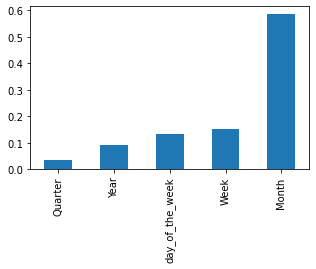

In [31]:
fea_Imp = pd.DataFrame(model.feature_importances_, index = Features, columns = ['feature_importance'])
#plot the features importance
fea_Imp.feature_importance.sort_values().plot(kind = 'bar', figsize =(5,3))
plt.show()

In [32]:
df_test['prediction'] = model.predict(X_test)

In [33]:
df_test

,Code,Warehouse,Category,Demand,day_of_the_week,Quarter,Month,Year,Week,prediction
Date,,,,,,,,,,
2016-01-28,Product_1178,Whse_A,Category_024,10,3,1,1,2016,4,4781.099609
2016-01-04,Product_1502,Whse_C,Category_019,100000,0,1,1,2016,1,9409.205078
2016-01-06,Product_0190,Whse_A,Category_007,320,2,1,1,2016,1,9323.250000
2016-01-06,Product_0337,Whse_A,Category_021,2,2,1,1,2016,1,9323.250000
2016-01-06,Product_1053,Whse_A,Category_024,10,2,1,1,2016,1,9323.250000
...,...,...,...,...,...,...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000,2,2,4,2016,17,4320.767090
2016-04-27,Product_1974,Whse_J,Category_006,1,2,2,4,2016,17,4320.767090
2016-04-28,Product_1787,Whse_J,Category_006,2500,3,2,4,2016,17,4462.161133


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['Demand'],df_test['prediction'])
print(mse)

946033032.1278524


In [35]:
rmse = np.sqrt(mse)
rmse

30757.649977328445

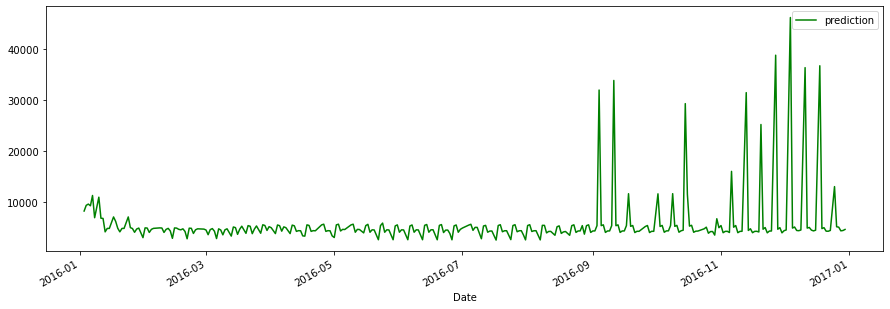

In [36]:
fig, ax = plt.subplots( figsize = (15,5))
df_test.prediction.plot(ax = ax, color = 'g', legend = 'Prediction')
# df_test.Demand.plot(ax = ax, color = 'r', style='.', legend = 'Testing')
plt.show()

In [37]:
df

,Code,Warehouse,Category,Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,3,7,2012,30
2012-01-19,Product_0979,Whse_J,Category_028,500,3,1,1,2012,3
2012-02-03,Product_0979,Whse_J,Category_028,500,4,1,2,2012,5
2012-02-09,Product_0979,Whse_J,Category_028,500,3,1,2,2012,6
2012-03-02,Product_0979,Whse_J,Category_028,500,4,1,3,2012,9
...,...,...,...,...,...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000,2,2,4,2016,17
2016-04-27,Product_1974,Whse_J,Category_006,1,2,2,4,2016,17
2016-04-28,Product_1787,Whse_J,Category_006,2500,3,2,4,2016,17


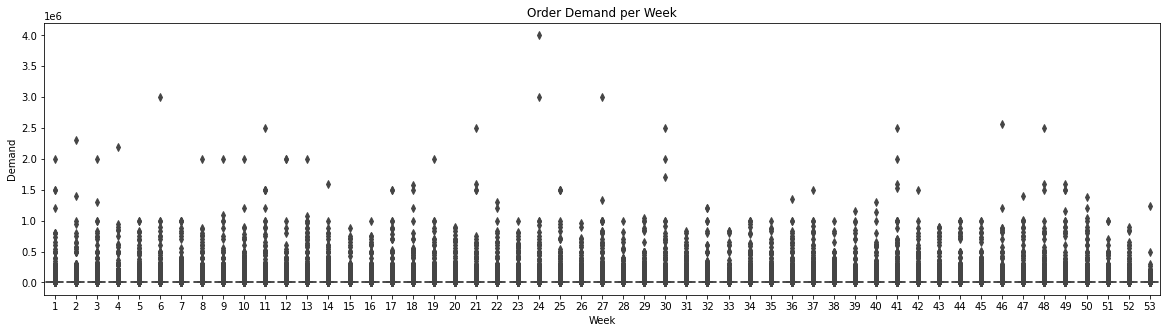

In [38]:
# time series analysis
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Week', y='Demand')
ax.set_title('Order Demand per Week')
plt.show()

In [39]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

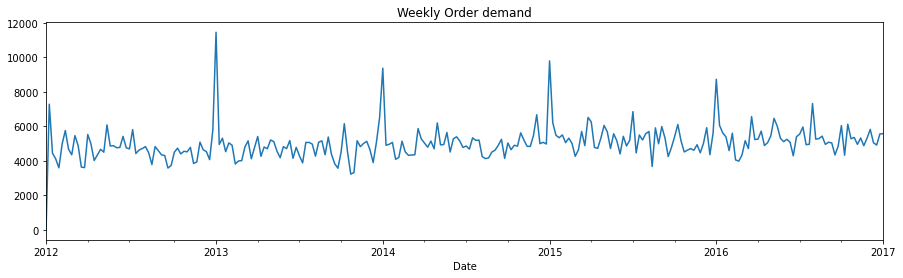

In [40]:
df_week['Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
plt.show()

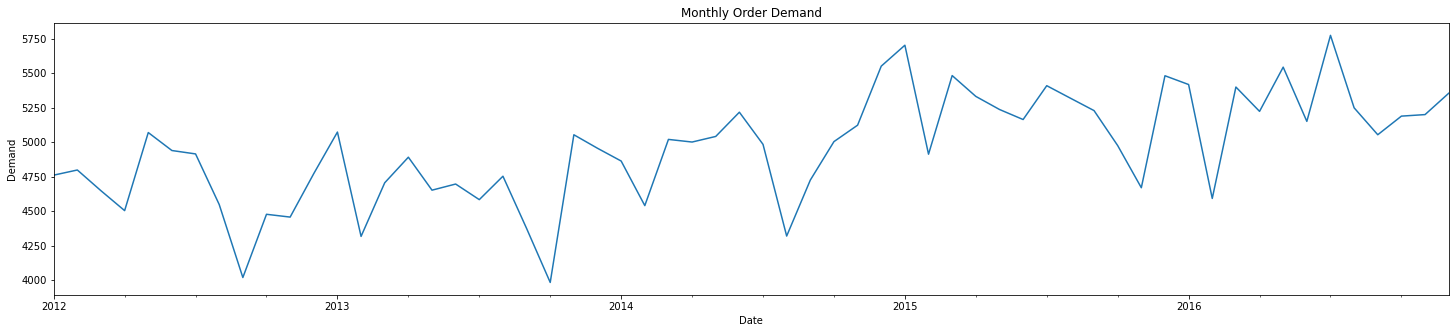

In [41]:
df_month = df.resample('MS').mean()
df_month.Demand.plot(figsize = (25,5), title = 'Monthly Order Demand')
plt.ylabel('Demand')
plt.show()

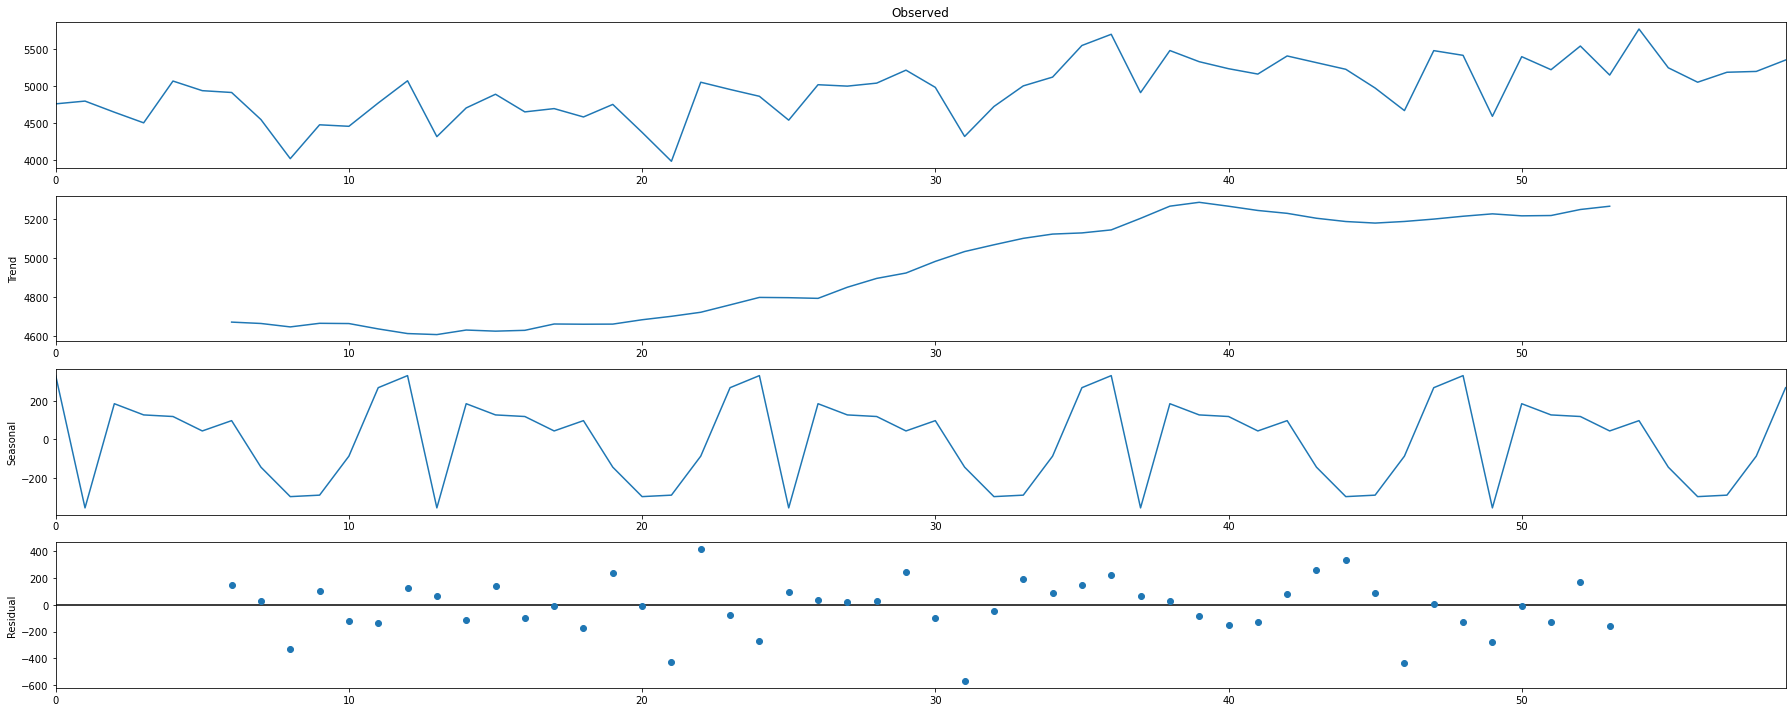

In [42]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df_month.Demand.values, model='additive', period = 12)
                   
fig = decomposition.plot()
plt.show()

In [43]:
# dickey-fuller test to check the stationarity
from statsmodels.tsa.stattools import adfuller

# ho - non stationary
# h1 - stationary
def adfuller_test(demand):
    result=adfuller(demand)
    labels=['ADF in Statistics', 'p-value', 'lags used', 'number of observations used']
    for value,label in zip(result, labels):
        print(label+ ' : '+str(value))
        if result[1]<=0.05:
            print("strong evidence against null hypo, reject null hypo")
        else:
            print("weak evidence against null hypo, non-stationary")

In [44]:
adfuller_test(df_month['Demand'])

ADF in Statistics : -2.2564880376249334
weak evidence against null hypo, non-stationary
p-value : 0.18638551125093383
weak evidence against null hypo, non-stationary
lags used : 2
weak evidence against null hypo, non-stationary
number of observations used : 57
weak evidence against null hypo, non-stationary


In [45]:
df_model

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500
...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000
2016-04-27,Product_1974,Whse_J,Category_006,1
2016-04-28,Product_1787,Whse_J,Category_006,2500


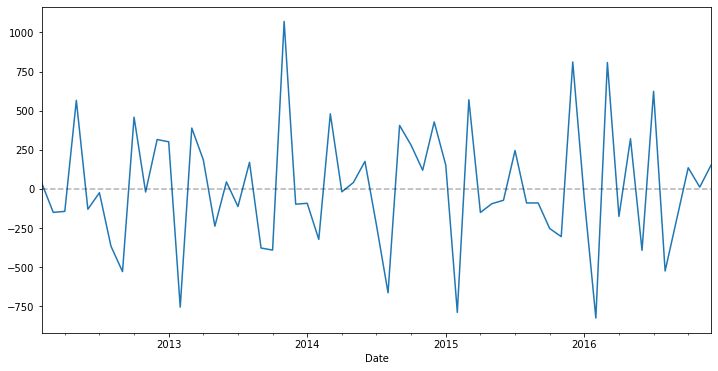

In [46]:
# Take First Difference to Remove Trend
df_diff = df_month.Demand.diff()[1:]
df_diff.plot(figsize=(12,6))
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [47]:
df_difference=pd.DataFrame(df_diff)
df_difference

,Demand
Date,
2012-02-01,37.331220
2012-03-01,-150.308697
2012-04-01,-144.000756
2012-05-01,565.562992
2012-06-01,-130.226029
2012-07-01,-24.596540
2012-08-01,-366.443987
2012-09-01,-528.876358
2012-10-01,458.021448


In [48]:
adfuller_test(df_difference['Demand'].dropna())

ADF in Statistics : -6.788910976933568
strong evidence against null hypo, reject null hypo
p-value : 2.3924287975570046e-09
strong evidence against null hypo, reject null hypo
lags used : 2
strong evidence against null hypo, reject null hypo
number of observations used : 56
strong evidence against null hypo, reject null hypo


In [49]:
adfuller_test(df_diff)

ADF in Statistics : -6.788910976933568
strong evidence against null hypo, reject null hypo
p-value : 2.3924287975570046e-09
strong evidence against null hypo, reject null hypo
lags used : 2
strong evidence against null hypo, reject null hypo
number of observations used : 56
strong evidence against null hypo, reject null hypo


<AxesSubplot:xlabel='Date'>

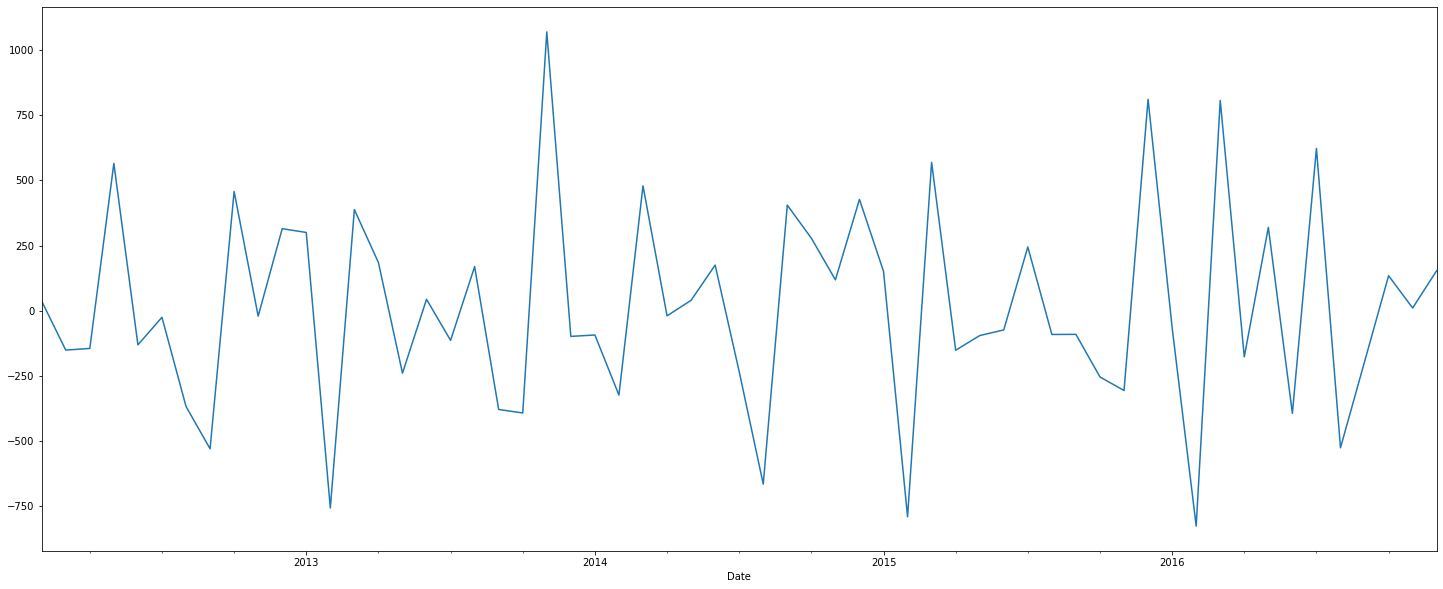

In [50]:
df_diff.plot()

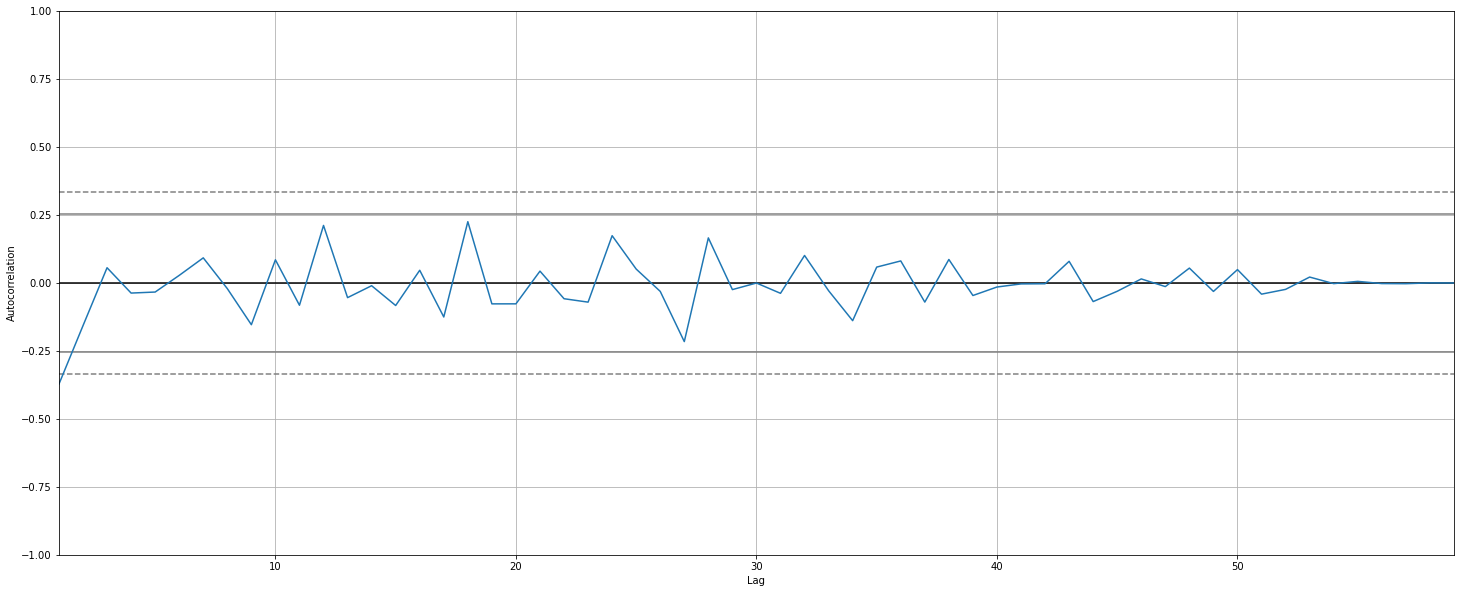

In [51]:
import pandas
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_difference['Demand'])
plt.show()

In [52]:
# ARIMA MOdel - Import libraries, plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


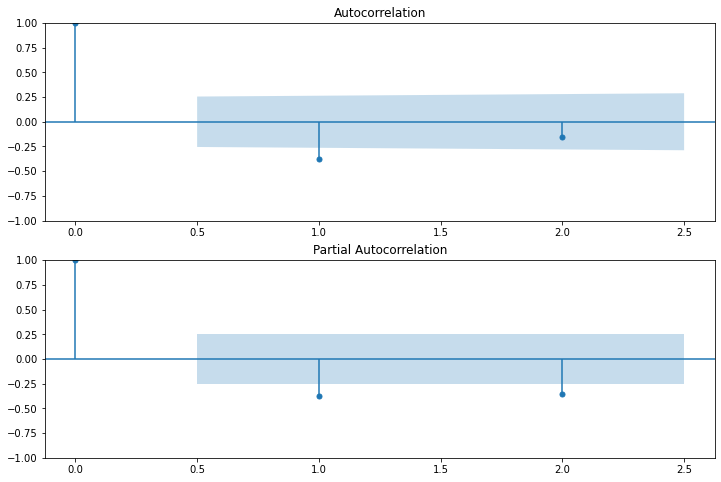

In [53]:
# p,d,q - p=AR Model lags, d=differencing, q=Moving avg lags
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff, lags = 2, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff, lags = 2, 
                ax = ax2)
plt.show()
# p=2, q=1, d=1 or p=1, q=1, d=1

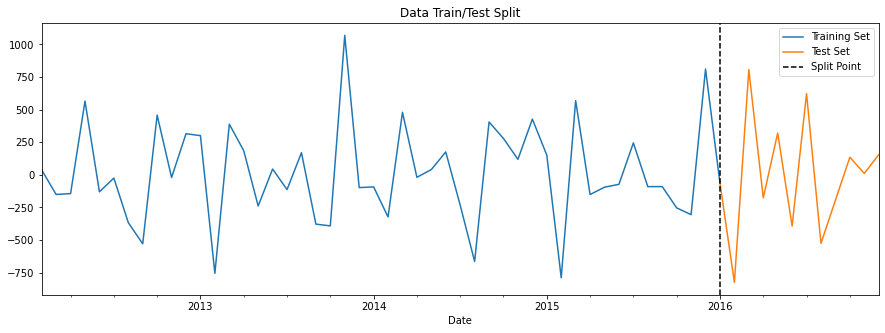

In [54]:
from datetime import datetime
from datetime import timedelta
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]
df_train1=pd.DataFrame(df_train)
df_test1=pd.DataFrame(df_test)

# plot train and test dataset on the same graph
fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

In [55]:
df_train1

,Demand
Date,
2012-02-01,37.331220
2012-03-01,-150.308697
2012-04-01,-144.000756
2012-05-01,565.562992
2012-06-01,-130.226029
2012-07-01,-24.596540
2012-08-01,-366.443987
2012-09-01,-528.876358
2012-10-01,458.021448


In [56]:
# Fit the model
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df_train, order = (2,1,1)).fit()

In [57]:
# summary of the model
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -343.242
Date:                Sat, 17 Jun 2023   AIC                            694.484
Time:                        15:56:20   BIC                            701.885
Sample:                    02-01-2012   HQIC                           697.269
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3710      0.168     -2.211      0.027      -0.700      -0.042
ar.L2         -0.3259      0.184     -1.768      0.077      -0.687       0.035
ma.L1         -0.9999      0.252     -3.964      0.0

In [58]:
# get the predictions start and end dates
pred_start = df_test.index[0]
pred_end= df_test.index[-1]

# Make predictions
prediction = model_arima.predict(start = pred_start, end = pred_end)

# Get the residuals
residuals = df_test - prediction

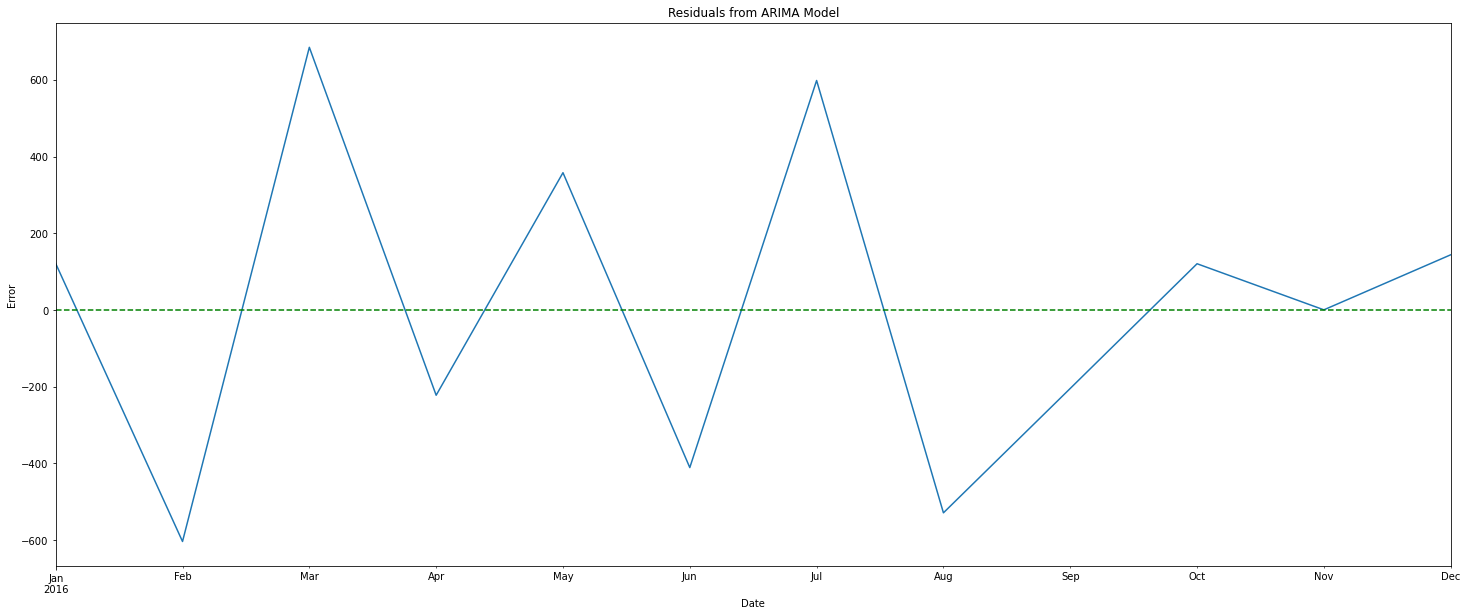

In [59]:
residuals.plot(kind = 'line', title = 'Residuals from ARIMA Model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

In [60]:
rmse = np.sqrt(np.mean(residuals**2))
rmse

398.9715113131861

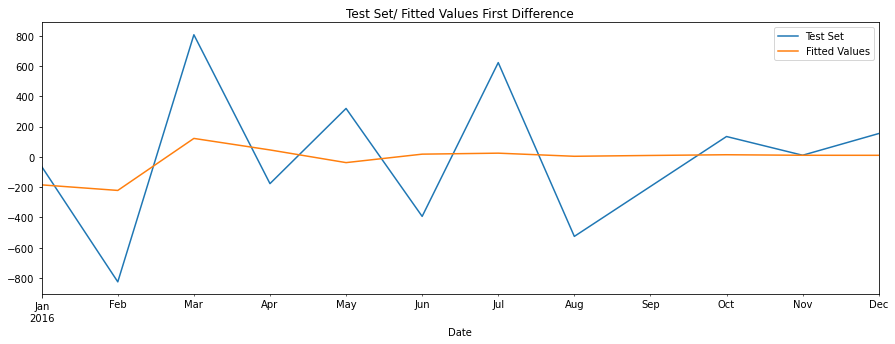

In [61]:
# Plot the train set against the predicted values
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
prediction.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima =SARIMAX(df_train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
print(model_sarima.summary().tables[1])
pred = model_sarima.predict(start = pred_start, end = pred_end, dynamic=True)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6185      0.204     -3.027      0.002      -1.019      -0.218
ar.L2         -0.5308      0.279     -1.899      0.058      -1.079       0.017
ma.L1         -0.9972     13.226     -0.075      0.940     -26.919      24.925
ar.S.L12      -0.3313      0.495     -0.669      0.503      -1.302       0.639
ma.S.L12      -0.5636      0.860     -0.655      0.512      -2.249       1.122
sigma2      9.223e+04   1.21e+06      0.076      0.939   -2.28e+06    2.46e+06


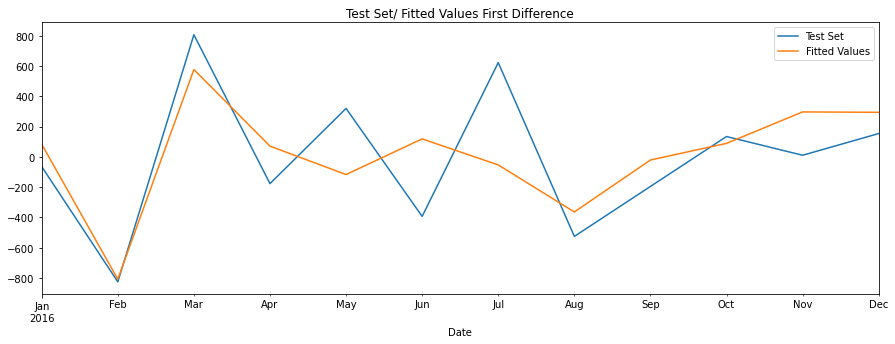

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [64]:
res = df_test - pred
rmse = np.sqrt(np.mean(res**2))
rmse

317.05668640382925

In [65]:
# Getting only the value of zeroth index since the diff() operation looses first value.
pred.iloc[0] = df_month.query('index == "2016-01-01"')['Demand']
#cumsum Return cumulative sum over a DataFrame or Series axis
model_predicted = pred.cumsum()
model_predicted.head()

2016-01-01    5416.990630
2016-02-01    4609.493408
2016-03-01    5186.828996
2016-04-01    5258.236984
2016-05-01    5141.875505
Freq: MS, Name: predicted_mean, dtype: float64

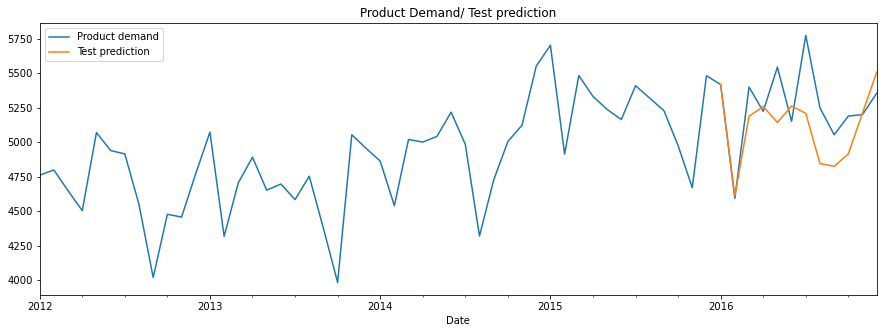

In [66]:
# Plot the actual data set and the actual predicted values
fig, ax = plt.subplots(figsize=(15, 5))
df_month.Demand.plot(ax=ax, label='Product Demand', title='Product Demand/ Test prediction')
model_predicted.plot(ax=ax, label='Test prediction')
ax.legend(['Product demand', 'Test prediction'])
plt.show()

In [67]:
# Grid Search
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
y = df['Demand'].resample('MS').mean()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(y,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2227      0.309      0.721      0.471      -0.383       0.828
ar.L2          0.0269      0.254      0.106      0.916      -0.472       0.526
ma.L1         -0.9192      0.166     -5.533      0.000      -1.245      -0.594
ar.S.L12      -0.5045      0.214     -2.360      0.018      -0.923      -0.085
sigma2      9.024e+04   2.72e+04      3.317      0.001    3.69e+04    1.44e+05


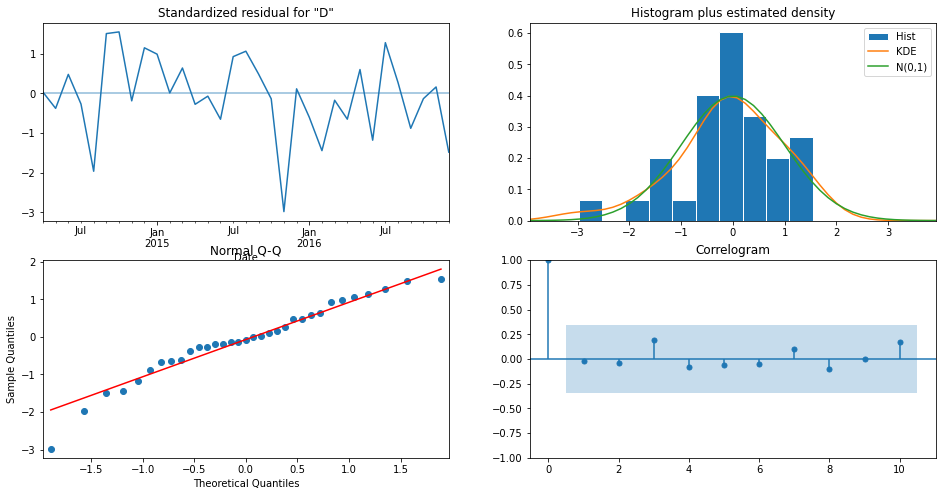

In [70]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

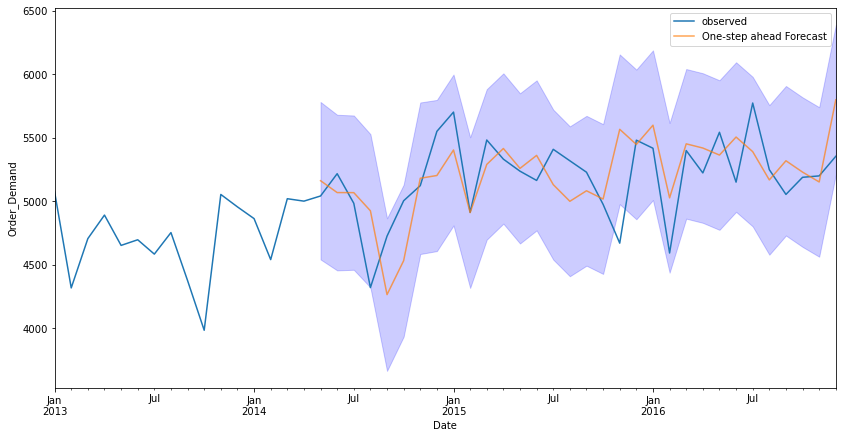

In [71]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [72]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

MSE 70596.76
RMSE: 265.7


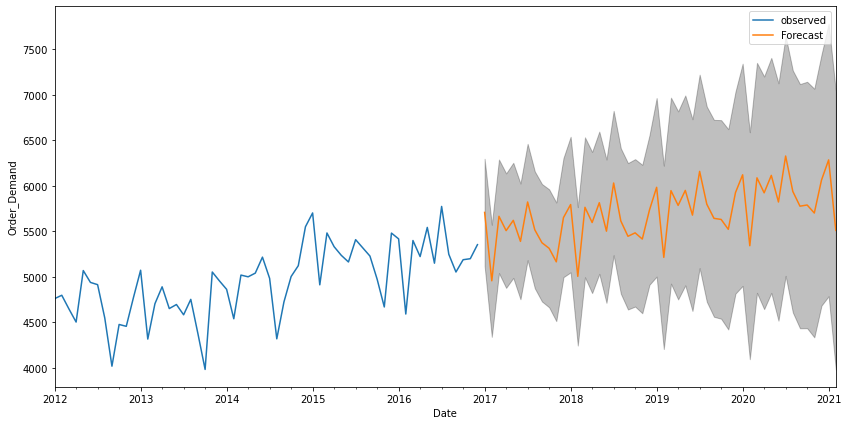

In [73]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()